In [1]:
from Regression import Regression
from Franke import FrankeCentered, FrankeCenteredNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn.utils import resample
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams['figure.figsize'] = [6.0, 6.0]

np.random.seed(1942)

In [3]:
#x, y = np.linspace(-0.5, 0.5, 101), np.linspace(-0.5, 0.5, 101)
#reg = Regression()
#reg.generate_generic_data(x, y, FrankeCenteredNoise)

terrain1 = imread("../input_data/SRTM_data_Norway_1.tif")[::16, ::16]
reg = Regression()
reg.load_matrix_data(terrain1); terrain1.shape

(226, 113)

# Bias Variance Tradeoff

In [ ]:
def bias_variance(solver, poly_orders, nr_bootstraps=100, lamda=1e-4):

    error_list = np.zeros(len(poly_orders))
    bias_list = np.zeros(len(poly_orders))
    var_list = np.zeros(len(poly_orders))

    x_train, x_test, y_train, y_test, output_train, output_test = train_test_split(reg.x_flat, reg.y_flat, reg.f_flat, test_size = 0.25)

    for j in trange(len(poly_orders)):
        poly_order = poly_orders[j]
        X_test = reg.get_X(x_test, y_test, poly_order=poly_order)
        output_pred = np.zeros((nr_bootstraps, output_test.shape[0]))
        for i in range(nr_bootstraps):
            x_, y_, output_ = resample(x_train, y_train, output_train)
            X_ = reg.get_X(x_, y_, poly_order=poly_order)
            if solver == "OLS" or solver == "OLS_unsafe" or solver == "Ridge":
                beta = reg.get_beta(X_, output_, solver=solver, lamda=lamda)
            elif solver == "Lasso":
                _Lasso = Lasso(alpha=lamda, fit_intercept=False, max_iter=1e8, tol=1e-3)
                clf = _Lasso.fit(X_, output_)
                beta = clf.coef_
            output_pred[i] = X_test@beta

        error = np.mean( np.mean((output_test - output_pred)**2, axis=0, keepdims=True) )
        bias = np.mean( (output_test - np.mean(output_pred, axis=0, keepdims=True))**2 )
        var = np.mean( np.var(output_pred, axis=0, keepdims=True) )

        error_list[j] += error
        bias_list[j] += bias
        var_list[j] += var
    
    return error_list, bias_list, var_list

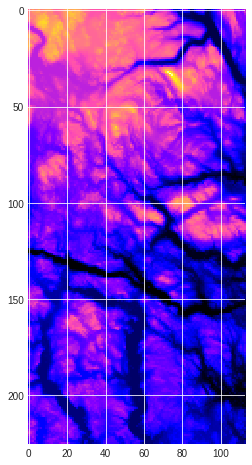

In [49]:
plt.figure(figsize=(16,8))
plt.imshow(terrain1)

In [57]:
poly_orders = np.arange(0, 10, 1)

error_list_OLS, bias_list_OLS, var_list_OLS = bias_variance("OLS", poly_orders)



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:01,  5.27it/s]

 20%|██        | 2/10 [00:00<00:01,  5.14it/s]

 30%|███       | 3/10 [00:00<00:01,  4.34it/s]

 40%|████      | 4/10 [00:01<00:02,  2.88it/s]

 50%|█████     | 5/10 [00:02<00:03,  1.66it/s]

 60%|██████    | 6/10 [00:04<00:04,  1.01s/it]

 70%|███████   | 7/10 [00:07<00:04,  1.61s/it]

 80%|████████  | 8/10 [00:11<00:04,  2.45s/it]

 90%|█████████ | 9/10 [00:18<00:03,  3.60s/it]

100%|██████████| 10/10 [00:26<00:00,  5.01s/it]

In [58]:
poly_orders = np.arange(0, 10, 1)

error_list_Ridge4, bias_list_Ridge4, var_list_Ridge4 = bias_variance("Ridge", poly_orders, lamda=1e-4)



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:01,  4.90it/s]

 20%|██        | 2/10 [00:00<00:01,  4.56it/s]

 30%|███       | 3/10 [00:00<00:01,  3.64it/s]

 40%|████      | 4/10 [00:01<00:02,  2.43it/s]

 50%|█████     | 5/10 [00:03<00:04,  1.23it/s]

 60%|██████    | 6/10 [00:05<00:04,  1.23s/it]

 70%|███████   | 7/10 [00:08<00:05,  1.83s/it]

 80%|████████  | 8/10 [00:13<00:05,  2.70s/it]

 90%|█████████ | 9/10 [00:19<00:03,  3.80s/it]

100%|██████████| 10/10 [00:28<00:00,  5.20s/it]

In [59]:
poly_orders_Lasso = np.arange(0, 8, 1)

error_list_Lasso3, bias_list_Lasso3, var_list_Lasso3 = bias_variance("Lasso", poly_orders_Lasso, lamda=1e-3)



  0%|          | 0/8 [00:00<?, ?it/s]

 12%|█▎        | 1/8 [00:00<00:02,  3.22it/s]

 25%|██▌       | 2/8 [00:00<00:01,  3.12it/s]

 38%|███▊      | 3/8 [00:01<00:02,  1.99it/s]

 50%|█████     | 4/8 [00:04<00:04,  1.24s/it]

 62%|██████▎   | 5/8 [00:18<00:14,  4.96s/it]

 75%|███████▌  | 6/8 [01:11<00:39, 19.58s/it]

 88%|████████▊ | 7/8 [06:01<01:40, 100.62s/it]

KeyboardInterrupt: 

In [ ]:
poly_orders_Lasso4 = np.arange(0, 6, 1)

error_list_Lasso4, bias_list_Lasso4, var_list_Lasso4 = bias_variance("Lasso", poly_orders_Lasso4, lamda=1e-4)

In [ ]:
plt.plot(poly_orders, error_list_OLS, color="navy", label="OLS")
plt.plot(poly_orders, error_list_Ridge4, color="crimson", label="Ridge4")
plt.plot(poly_orders_Lasso, error_list_Lasso3, color="crimson", label="Lasso3")

In [ ]:
plt.plot(poly_orders, bias_list_OLS, color="navy", label="OLS")
plt.plot(poly_orders, bias_list_Ridge4, color="crimson", label="Ridge4")
plt.plot(poly_orders_Lasso, bias_list_Lasso3, color="crimson", label="Lasso3")

In [ ]:
plt.plot(poly_orders, var_list_OLS, color="navy", label="OLS")
plt.plot(poly_orders, var_list_Ridge4, color="crimson", label="Ridge4")
plt.plot(poly_orders_Lasso, var_list_Lasso3, color="crimson", label="Lasso3")

# Only Error (no bootstrap)

In [40]:
err_list_OLS = []
times_OLS = []

#poly_orders = 2**np.linspace(2, 6.5, 8)
poly_orders = np.linspace(2, 128, 20)

for i in range(len(poly_orders)):
    poly_order = int(poly_orders[i])
    print(poly_order)
    t0 = time.time()
    data_pred_OLS = reg.solveKFold(poly_order=poly_order, K=5, solver="OLS")
    print(f"{time.time() - t0:.2f}")
    times_OLS.append(time.time() - t0)
    err_list_OLS.append(MSE(reg.f, data_pred_OLS))

4
0.07
6
0.19
9
0.44
15
1.00
23
2.25
37
7.23
57
27.16
90
205.85


In [41]:
np.save("../data/err_OLS.npy", err_list_OLS)
err_list_OLS = np.load("../data/err_OLS.npy")

In [42]:
err_list_Ridge6 = []
times_Ridge = []
for i in range(len(poly_orders)):
    poly_order = int(poly_orders[i])
    print(poly_order)
    data_pred_Ridge6 = reg.solveKFold(poly_order=poly_order, K=5, solver="Ridge", lamda=1e-6)
    print(f"{time.time() - t0:.2f}")
    times_Ridge.append(time.time() - t0)
    err_list_Ridge6.append(MSE(reg.f, data_pred_Ridge6))

4
6
9
15
23
37
57
90


In [43]:
np.save("../data/err_Ridge6.npy", err_list_Ridge6)
err_list_Ridge6 = np.load("../data/err_Ridge6.npy")

In [44]:
err_list_Ridge8 = []

for i in range(len(poly_orders)):
    poly_order = int(poly_orders[i])
    print(poly_order)
    data_pred_Ridge8 = reg.solveKFold(poly_order=poly_order, K=5, solver="Ridge", lamda=1e-8)
    err_list_Ridge8.append(MSE(reg.f, data_pred_Ridge8))

4
6
9
15
23
37
57
90


In [45]:
np.save("../data/err_Ridge8.npy", err_list_Ridge8)
err_list_Ridge8 = np.load("../data/err_Ridge8.npy")

In [8]:
err_list_Lasso = []
times_Lasso4 = []

poly_orders_Lasso = 2**np.linspace(2, 3, 2)

for i in range(len(poly_orders_Lasso)):
    poly_order = int(poly_orders_Lasso[i])
    print(poly_order)
    t0 = time.time()
    data_pred_Lasso = reg.solveKFold(poly_order=poly_order, K=5, solver="Lasso", lamda=1e-4, tol=1e-3, max_iter=1e8)
    print(f"{time.time() - t0:.2f}")
    times_Lasso4.append(time.time() - t0:.2f)
    err_list_Lasso.append(MSE(reg.f, data_pred_Lasso))

4
0.70
8


KeyboardInterrupt: 

In [ ]:
np.save("../data/err_Lasso.npy", err_list_Lasso)
err_list_Lasso = np.load("../data/err_Lasso.npy")

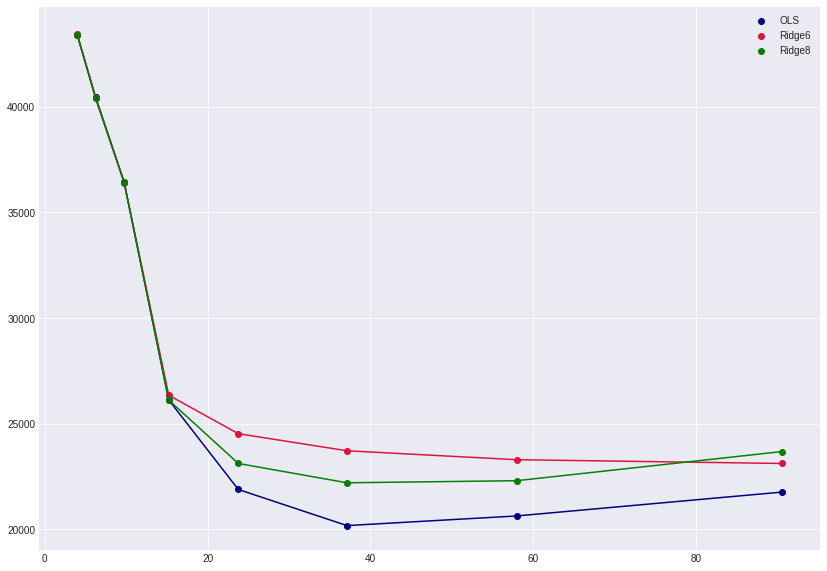

In [46]:
plt.figure(figsize = (14,10))
plt.scatter(poly_orders, err_list_OLS, color="navy", label="OLS")
plt.plot(poly_orders, err_list_OLS, color="navy")
plt.scatter(poly_orders, err_list_Ridge6, color="crimson", label="Ridge6")
plt.plot(poly_orders, err_list_Ridge6, color="crimson")
plt.scatter(poly_orders, err_list_Ridge8, color="green", label="Ridge8")
plt.plot(poly_orders, err_list_Ridge8, color="green")
#plt.scatter(poly_orders_Lasso, err_list_Lasso, color="yellow", label="Lasso4")
#plt.plot(poly_orders_Lasso, err_list_Lasso, color="yellow")
plt.legend();

In [47]:
plt.imshow(data_pred_Ridge6)

NameError: name 'data_pred_Ridge' is not defined

In [ ]:
plt.imshow(data_pred_OLS)

In [ ]:
#plt.imshow(data_pred_Lasso)